## Question 2 : Récupérer les données CSV avec la librairie Panda

In [1]:
import pandas as pd


#import du fichier UserData.csv avec pandas

df= pd.read_csv("/home/fatimam/Documents/formation_ia/P4 Regression logistique/UserData.csv")


#affichage de la DataFrame
df

# visualisation des données

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [2]:
# connection à mysql
# mysql -u root -p
# SHOW DATABASES;
# CREATE DATABASE UserIphone;
# USE UserIphone
# SHOW tables;
# CREATE TABLE

## Question 5 : Visualisation et Analyse des données avec les librairies Matplotlib et Seaborn

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm

### 1/ Visualisation avec Python et la librairie Matplotlib

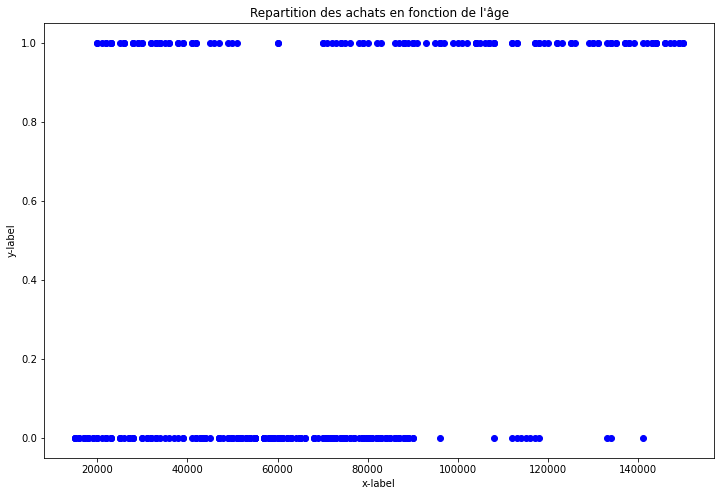

In [4]:
plt.figure(figsize =(12,8))
plt.title("Repartition des achats en fonction de l'âge")
plt.xlabel("x-label")
plt.ylabel("y-label")
plt.scatter (df.EstimatedSalary,df.Purchased,color ='b')

### Nettoyage de la dataset

In [5]:
# supression de la Colonne UserID
df.drop(['User ID'],axis='columns',inplace=True)

In [6]:
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [7]:
df.Gender =df.Gender.map({'Male' : 1,'Female' : 2})

In [8]:
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,2,26,43000,0
3,2,27,57000,0
4,1,19,76000,0


### Projection 3D

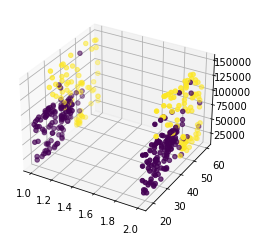

In [9]:
ax=plt.axes(projection='3d')
ax.scatter(df.Gender,df.Age,df.EstimatedSalary, c=df.Purchased)

La répartition homme/femme,selon ce graphique , semble uniforme. Le genre n'a pas d'influence sur l'acte d'achat

### Recherche sur la pertinence des différentes variables pour l'acte de l'achat

#### Calcul du pourcentage d'achat 

In [10]:
# utilisation de la fonction count
#fonctions pour compter le nombre d'achat
count_sub = len(df[df['Purchased']==1])
# fonctions pour compter le nombre d'absence d'achat
count_no_sub = len(df[df['Purchased']==0])
#calcul du pourcentage d'absence d'achat
pct_of_no_sub = count_no_sub/(count_no_sub+count_sub)
print("Le pourcentage abscence d'achat est de",pct_of_no_sub*100,'%')


Le pourcentage abscence d'achat est de 64.25 %


#### Calcul du pourcentage d'achat en fonction du genre

Text(0, 0.5, "Pourcentage d'achat")

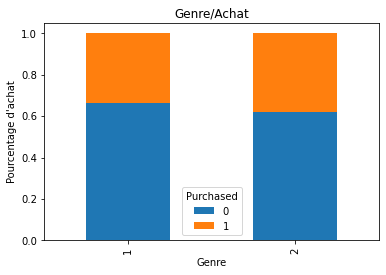

In [11]:
# Influence du genre sur l'acte d'achat
table=pd.crosstab(df.Gender, df.Purchased)
table.div(table.sum(1).astype(float), axis =0).plot(kind ='bar', stacked=True)
plt.title('Genre/Achat')
plt.xlabel('Genre')
plt.ylabel("Pourcentage d'achat")

Ce graphique confirme que le genre n'a pas d'impact sur l'acte d'achat. Il n'est pas pertinent de prendre en compte la variable genre dans la  prise de décision d'achat.

In [12]:
# supression de la Colonne Gender
df.drop(['Gender'],axis='columns',inplace=True)
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


#### Calcul du pourcentage d'achat en fonction de l'âge

Text(0, 0.5, "Pourcentage d'achat")

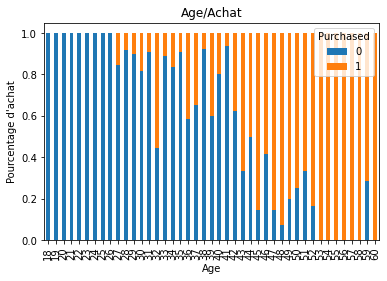

In [13]:
# Influence de l'âge sur l'acte d'achat
table=pd.crosstab(df.Age, df.Purchased)
table.div(table.sum(1).astype(float), axis =0).plot(kind ='bar', stacked=True)
plt.title('Age/Achat')
plt.xlabel('Age')
plt.ylabel("Pourcentage d'achat")

Ce graphique montre une grande disparité . Il est pertinent de prendre en compte la variable Age dans la prise de décision d'achat.

#### Calcul du pourcentage d'achat en fonction du salaire estimé

Text(0, 0.5, "Pourcentage d'achat")

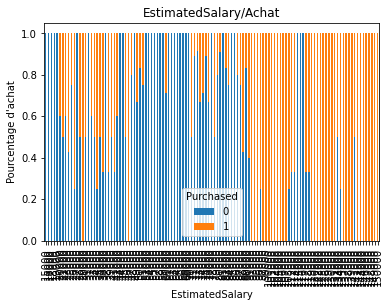

In [14]:
# Influence du salaire sur l'acte d'achat
table=pd.crosstab(df.EstimatedSalary, df.Purchased)
table.div(table.sum(1).astype(float), axis =0).plot(kind ='bar', stacked=True)
plt.title('EstimatedSalary/Achat')
plt.xlabel('EstimatedSalary')
plt.ylabel("Pourcentage d'achat")

Ce graphique montre une grande disparité . Il est pertinent de prendre en compte la variable Salaire dans la  prise de décision d'achat. 

### 2/ Visualisation avec Python et la librairie Seaborn

In [15]:
import numpy as np
import seaborn as sns
sns.set()

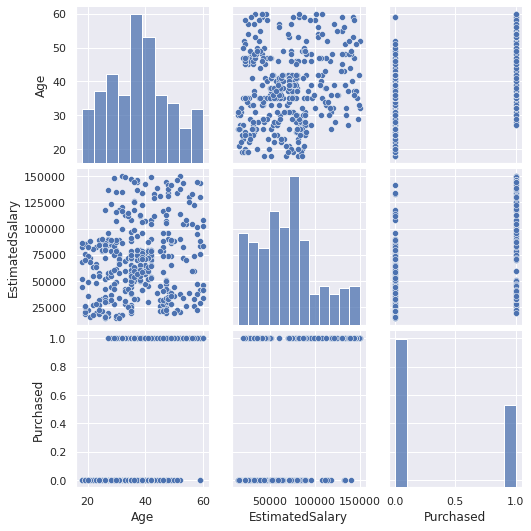

In [16]:
sns.pairplot(df)

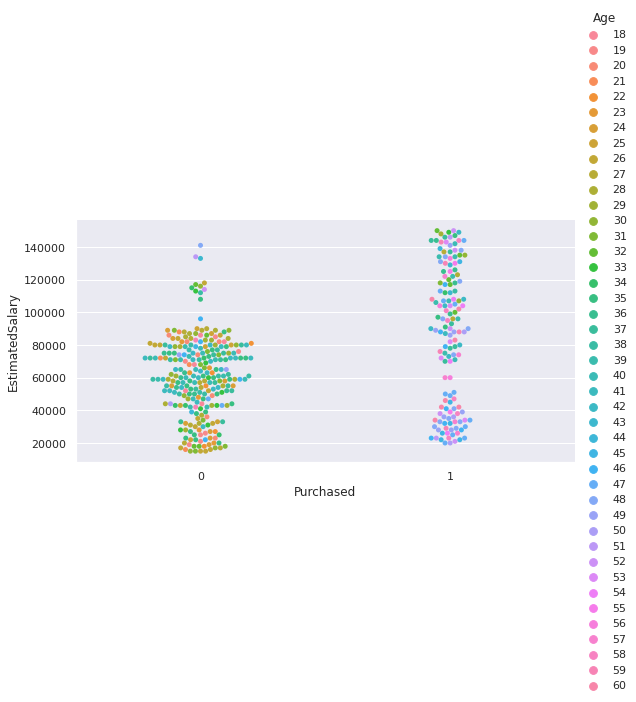

In [17]:
sns.catplot (x = 'Purchased', y= 'EstimatedSalary',data = df, kind = 'swarm',hue ='Age',aspect=2, height =4)

Cette projection des achats en fonction des salaires et de l'âge confirme la pertinence des variables âge et salaire .On voit nettement que plus les salaires et les âges sont bas,moins il y a d'actes d'achat.

## Calcul des proportions d'achats

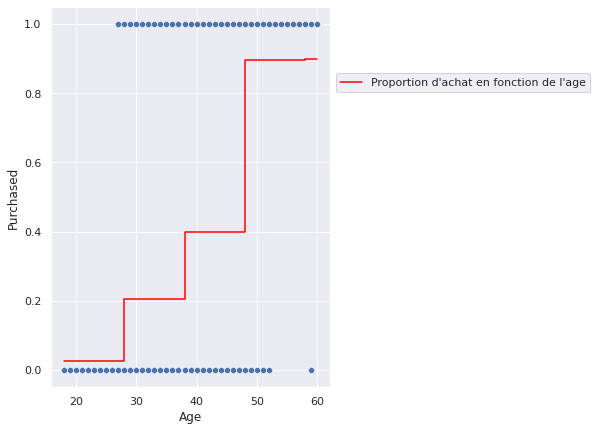

In [18]:
df['cl_Age'] = pd.cut(df['Age'], bins = np.arange(18,75,10), right=False)
prop = pd.crosstab(df['cl_Age'], df['Purchased'], normalize='index')
prop_purchased = pd.DataFrame(data = {'Age': np.concatenate((np.array([18]), 
                                                       np.repeat(np.arange(28,60,10), repeats=2), 
                                                       np.array([60])), axis=0),
                                'prop_purchased': np.repeat(prop.loc[:,1].values, repeats=2)})
plt.figure(figsize=(5,7))
ax = sns.scatterplot(x="Age", y="Purchased", data=df)
plt.plot(prop_purchased['Age'], prop_purchased['prop_purchased'], color='red', label="Proportion d'achat en fonction de l'age")
ax.legend(loc='center left', bbox_to_anchor=(1, 0.8))
plt.show()

## Question 6  : Résolution du cas d'étude 

In [19]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import FunctionTransformer
from sklearn.metrics import confusion_matrix
from  sklearn.metrics import classification_report
from matplotlib.colors import ListedColormap
from mpl_toolkits.mplot3d import Axes3D

In [20]:
df.head()

,Age,EstimatedSalary,Purchased,cl_Age
0,19,19000,0,"[18, 28)"
1,35,20000,0,"[28, 38)"
2,26,43000,0,"[18, 28)"
3,27,57000,0,"[18, 28)"
4,19,76000,0,"[18, 28)"


In [21]:
#Definition des variables en x (variables indépendantes) et y (variable dépendante)

X = df [['Age','EstimatedSalary']].values
y = df['Purchased'].values
y=y.astype('int')

#### Création du jeu de donnée d'entrainement et du jeu de donnée de test

In [22]:
# Division de la dataset entre le training set et le Test set
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state = 0)

#Mise à l'échelle des données 
# Utilisation de la méthode StandardScaler() sur les variables âge et salaire entre -2 et 2 
# pour avoir des données dans le même ordre de grandeur pour pouvoir utiliser un algorythme 
# qui pourra comparer les données
# fonction fit_transform : met à l'echelle les données et les sauvegarder
scale = StandardScaler()
# mise à l'échelle du premier jeu de donnée
X_train = scale.fit_transform(X_train)
# mise à l'échelle du deuxieme jeu de donnée
X_test = scale.transform(X_test)

X_test

array([[-0.80480212,  0.50496393],
       [-0.01254409, -0.5677824 ],
       [-0.30964085,  0.1570462 ],
       [-0.80480212,  0.27301877],
       [-0.30964085, -0.5677824 ],
       [-1.10189888, -1.43757673],
       [-0.70576986, -1.58254245],
       [-0.21060859,  2.15757314],
       [-1.99318916, -0.04590581],
       [ 0.8787462 , -0.77073441],
       [-0.80480212, -0.59677555],
       [-1.00286662, -0.42281668],
       [-0.11157634, -0.42281668],
       [ 0.08648817,  0.21503249],
       [-1.79512465,  0.47597078],
       [-0.60673761,  1.37475825],
       [-0.11157634,  0.21503249],
       [-1.89415691,  0.44697764],
       [ 1.67100423,  1.75166912],
       [-0.30964085, -1.37959044],
       [-0.30964085, -0.65476184],
       [ 0.8787462 ,  2.15757314],
       [ 0.28455268, -0.53878926],
       [ 0.8787462 ,  1.02684052],
       [-1.49802789, -1.20563157],
       [ 1.07681071,  2.07059371],
       [-1.00286662,  0.50496393],
       [-0.90383437,  0.30201192],
       [-0.11157634,

## Regression logistique avec sklearn

#### Construction du modèle

In [23]:
#Construction du modèle
LR = LogisticRegression(random_state = 0, solver ='liblinear')
LR.fit(X_train, y_train)



LogisticRegression(random_state=0, solver='liblinear')

#### Vérification de la fiabilité de notre modèle

In [24]:
y_pred = LR.predict(X_test)
LR.score(X_test, y_test)

0.89

Notre modèle est fiable à 89%

In [25]:
# Matrice de confusion
# La matrice de confusion permet de comparer les resultats des test et des previsions

cm =confusion_matrix(y_test,y_pred)
print(cm)

[[65  3]
 [ 8 24]]


Le nombre de bonnes prédictions est de 89.
Il semble que notre modèle produit plus de faux négatifs.

#### Prediction d'achat de notre nouveau client

In [28]:
#prediction pour notre client de 36 ans gagnant 67000$
x_predict =scale.transform([[37,67000]])
LR.predict(x_predict)

array([0])

Notre nouveau client n'achetera pas l'Iphone

## Regression logistique

In [29]:
reg_log1 = smf.glm('Purchased ~ Age', data=df, family=sm.families.Binomial()).fit()

print(reg_log1.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Purchased   No. Observations:                  400
Model:                            GLM   Df Residuals:                      398
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -168.13
Date:                Fri, 20 Nov 2020   Deviance:                       336.26
Time:                        09:17:59   Pearson chi2:                     395.
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -8.0441      0.784    -10.258      0.0

On obtient les paramètres estimés : 𝛽̂ 1=−8.04 et 𝛽̂ 2=0.188 

In [30]:
beta1 = reg_log1.params[0]
beta2 = reg_log1.params[1]

In [31]:
x = np.linspace(start=18, stop=60, num=50)
y = np.exp(beta1+beta2*x)/(1+np.exp(beta1+beta2*x))
reg_log = pd.DataFrame(data={'Age': x, 'prop_purchased': y})

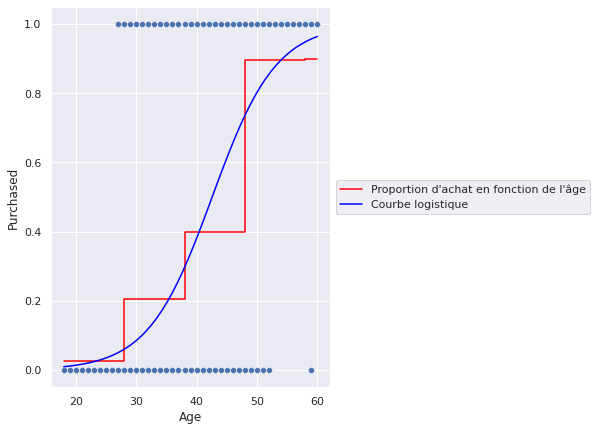

In [32]:
plt.figure(figsize=(5,7))
ax = sns.scatterplot(x="Age", y="Purchased", data=df)
plt.plot(prop_purchased['Age'], prop_purchased['prop_purchased'], color='red', label="Proportion d'achat en fonction de l'âge" )
plt.plot(reg_log['Age'], reg_log['prop_purchased'], color='blue', label='Courbe logistique')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()
#faire un scater.plot avec toutes les données

In [33]:
# df['cl_Salaire'] = pd.cut(df['EstimatedSalary'], bins = np.arange(10000,160000,10000), right=False)
# prop = pd.crosstab(df['cl_Salaire'], df['Purchased'], normalize='index')
# prop_purchased = pd.DataFrame(data = {'EstimatedSalary': np.concatenate((np.array([10000]), 
#                                                        np.repeat(np.arange(15000,160000,10000), repeats=2), 
#                                                        np.array([10000])), axis=0),
#                                 'prop_purchased': np.repeat(prop.loc[:,1].values, repeats=2)})

In [34]:
reg_log2 = smf.glm('Purchased~EstimatedSalary',
                   data=df, family=sm.families.Binomial()).fit()
print(reg_log2.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Purchased   No. Observations:                  400
Model:                            GLM   Df Residuals:                      398
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -233.86
Date:                Fri, 20 Nov 2020   Deviance:                       467.73
Time:                        09:18:14   Pearson chi2:                     426.
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -2.3227      0.286     

In [35]:
beta3 = reg_log1.params[0]
beta4 = reg_log1.params[1]

In [36]:
# Mise à l'échelle des données 
# Utilisation de la méthode StandardScaler() sur les variables Purchased et salaire entre -2 et 2 
# pour avoir des données dans le même ordre de grandeur pour pouvoir utiliser un algorythme 
# qui pourra comparer les données
# fonction fit_transform : met à l'echelle les données et les sauvegarder
scale = StandardScaler()
x = scale.fit_transform(x)


ValueError: Expected 2D array, got 1D array instead:
array=[18.         18.85714286 19.71428571 20.57142857 21.42857143 22.28571429
 23.14285714 24.         24.85714286 25.71428571 26.57142857 27.42857143
 28.28571429 29.14285714 30.         30.85714286 31.71428571 32.57142857
 33.42857143 34.28571429 35.14285714 36.         36.85714286 37.71428571
 38.57142857 39.42857143 40.28571429 41.14285714 42.         42.85714286
 43.71428571 44.57142857 45.42857143 46.28571429 47.14285714 48.
 48.85714286 49.71428571 50.57142857 51.42857143 52.28571429 53.14285714
 54.         54.85714286 55.71428571 56.57142857 57.42857143 58.28571429
 59.14285714 60.        ].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:


x = (np.linspace(start=10000, stop=160000, num=10000))
y = np.exp(beta3+beta4*x)/(1+np.exp(beta3+beta4*x))
reg_log4 = pd.DataFrame(data={'EstimatedSalary': x, 'prop_purchased': y})

NameError: name 'reg_log4' is not defined

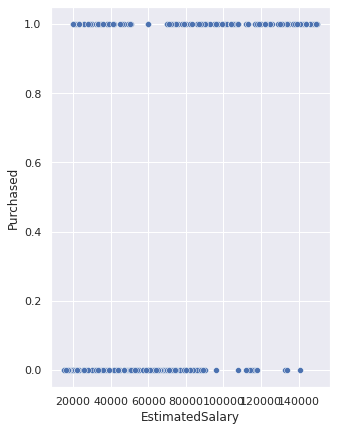

In [37]:
plt.figure(figsize=(5,7))
ax = sns.scatterplot(x="EstimatedSalary", y="Purchased", data=df)
# plt.plot(reg_log['Age'], reg_log['prop_purchased'], color='blue', label='Courbe logistique')
plt.plot(reg_log4['EstimatedSalary'], reg_log4['prop_purchased'], color='black', label='Courbe salaire')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [38]:
df['EstimatedSalary'].describe()


count       400.000000
mean      69742.500000
std       34096.960282
min       15000.000000
25%       43000.000000
50%       70000.000000
75%       88000.000000
max      150000.000000
Name: EstimatedSalary, dtype: float64